In [1]:
import skfuzzy as sf
from skfuzzy import control as ct
import numpy as np

In [2]:
calidad = ct.Antecedent(np.arange(0,11,1), 'calidad')
servicio = ct.Antecedent(np.arange(0,11,1), 'servicio')
tip = ct.Consequent(np.arange(0,26,1), 'tip')

In [3]:
calidad.automf(3)

In [4]:
servicio.automf(3)

In [5]:
tip['poor'] = sf.trimf(tip.universe, [0,0,13])
tip['average'] = sf.trimf(tip.universe, [0,13,25])
tip['good'] = sf.trimf(tip.universe, [13,25,25])

/home/stiven/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


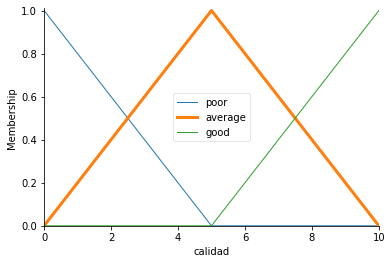

In [6]:
calidad['average'].view()

/home/stiven/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


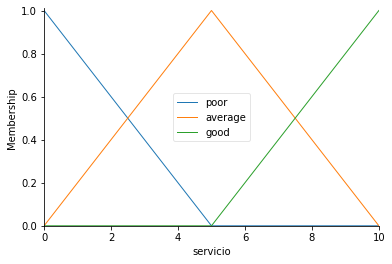

In [7]:
servicio.view()

/home/stiven/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


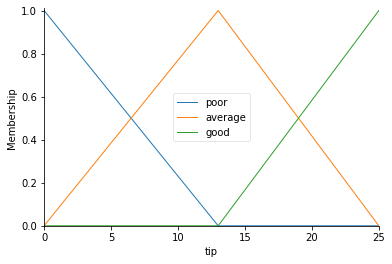

In [8]:
tip.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

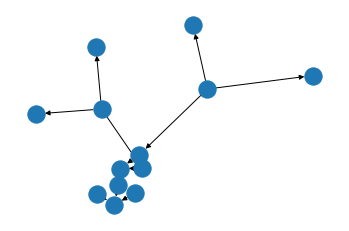

In [9]:
regla1 = ct.Rule(calidad['poor'] & servicio['poor'], tip['poor'])
regla1.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

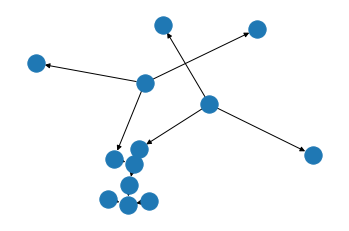

In [10]:
regla2 = ct.Rule(calidad['average'] & servicio['average'], tip['average'])
regla2.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

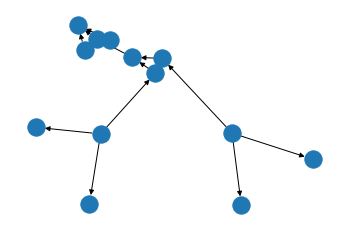

In [11]:
regla3 = ct.Rule(calidad['good'] & servicio['good'], tip['good'])
regla3.view()

In [12]:
control_de_tipping = ct.ControlSystem([regla1,regla2,regla3])
tipping = ct.ControlSystemSimulation(control_de_tipping)

In [15]:
tipping.input['calidad'] = 4.5
tipping.input['servicio'] = 5
tipping.compute()
print(tipping.output['tip'])

12.663636363636359


/home/stiven/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


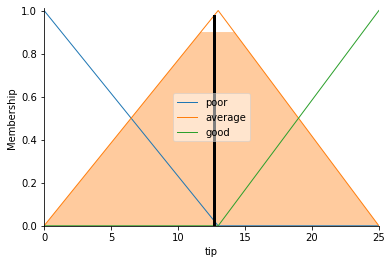

In [16]:
tip.view(sim=tipping)